# Library 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#Data

In [ ]:
data=pd.read_excel("student-mat_excel.xlsx")

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
np.sum(data.isna())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Data preprocessing 

In [ ]:
data['Sch_int'] = data.school.map({'GP':0, 'MS':1})
data['gender'] = data.sex.map({'F':0, 'M':1})
data['add_int'] = data.address.map({'U':0, 'R':1})
data['act_int'] = data.activities.map({'yes':0, 'no':1})
data['reason_int'] = data.reason.map({'home':0, 'reputation':1, 'course':2, 'other':3})
data['paid_int'] = data.paid.map({'yes':0, 'no':1})
data['schoolsup_int'] = data.schoolsup.map({'yes':0, 'no':1})
data['fs_int'] = data.famsize.map({'GT3':0, 'LE3':1})
data['ps_int'] = data.Pstatus.map({'A':0, 'T':1})
data['nur_int'] = data.nursery.map({'yes':0, 'no':1})
data['high_int'] = data.higher.map({'yes':0, 'no':1})
data['int_int'] = data.internet.map({'yes':0, 'no':1})
data['rom_int'] = data.romantic.map({'yes':0, 'no':1})


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,act_int,reason_int,paid_int,schoolsup_int,fs_int,ps_int,nur_int,high_int,int_int,rom_int
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,2,1,0,0,0,0,0,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,2,1,1,0,1,1,0,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,3,0,0,1,1,0,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,0,1,0,1,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,2,0,1,1,0,0,0,1,1
391,MS,M,17,U,LE3,T,3,1,services,services,...,1,2,1,1,1,1,1,0,0,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,1,2,1,1,0,1,1,0,1,1
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,2,1,1,1,1,1,0,0,1


# EDA

In [ ]:
a = data[{"Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2"}]
a

,failures,health,G2,G1,paid_int,gender,reason_int,schoolsup_int,studytime,absences,act_int,Sch_int,add_int
0,0,3,6,5,1,0,2,0,2,6,1,0,0
1,0,3,5,5,1,0,2,1,2,4,1,0,0
2,3,3,8,7,0,0,3,0,2,10,1,0,0
3,0,5,14,15,0,0,0,1,3,2,0,0,0
4,0,5,10,6,0,0,0,1,2,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,4,9,9,0,1,2,1,2,11,1,1,0
391,0,2,16,14,1,1,2,1,1,3,1,1,0
392,3,3,8,10,1,1,2,1,1,3,1,1,1
393,0,5,12,11,1,1,2,1,1,0,1,1,1


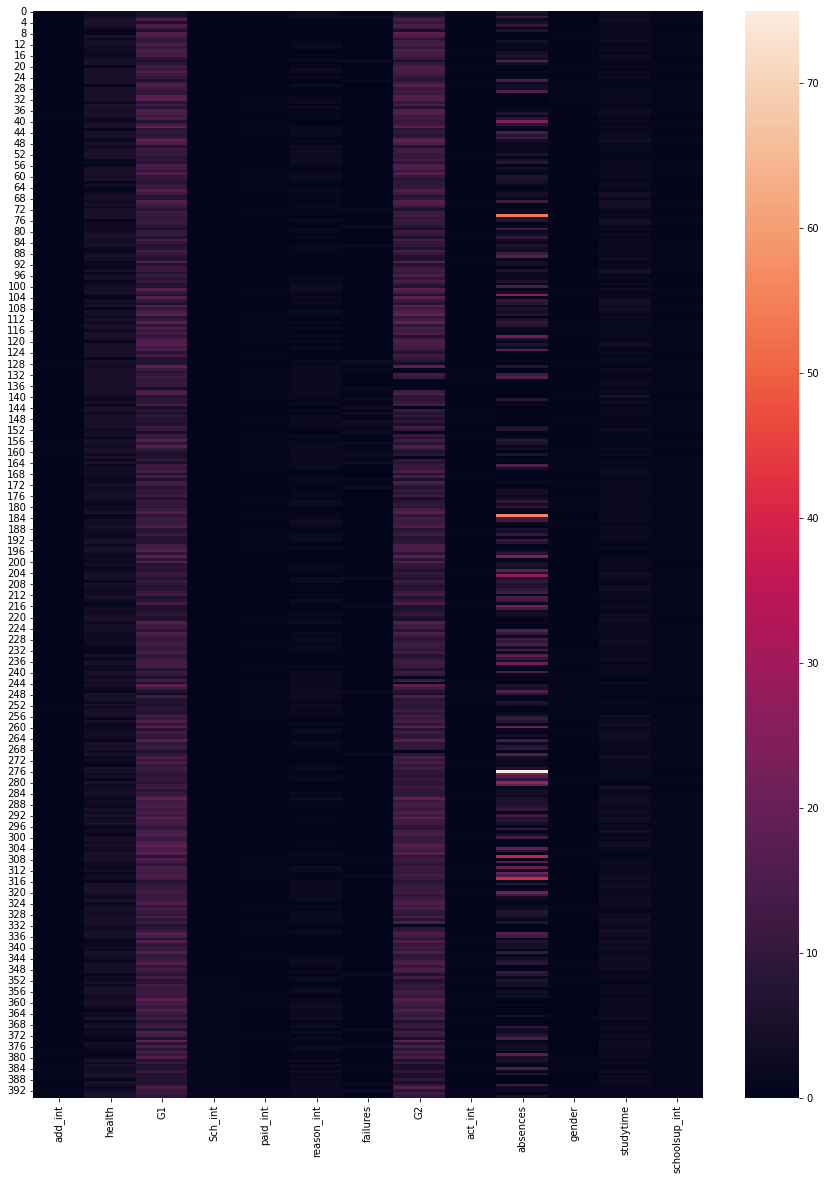

In [ ]:
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 20);
sns.heatmap(a)

In [ ]:
data.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G1,G2,G3,Sch_int,gender,add_int,act_int,reason_int,paid_int,schoolsup_int
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,5,6,6,0,0,0,1,2,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,5,6,0,0,0,1,2,1,1


In [ ]:
sr=data.groupby("Sch_int")["reason_int"].mean()
sr


Sch_int
0    1.229226
1    1.608696
Name: reason_int, dtype: float64

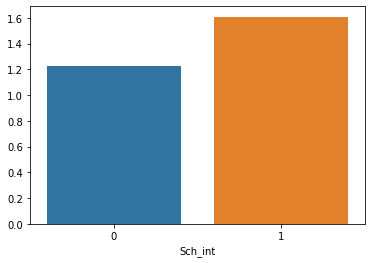

In [ ]:
sns.barplot(x=sr.index,y=sr.values)

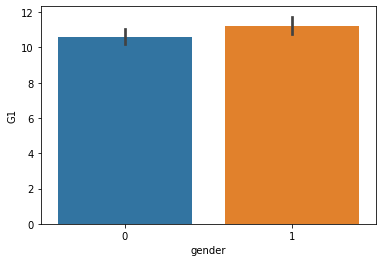

In [ ]:
sns.barplot(x = "gender", y= "G1", data=data)

In [ ]:
testing = data[{"Sch_int","gender","age","fs_int","ps_int","add_int","reason_int","traveltime","studytime","failures","schoolsup_int","paid_int","act_int","nur_int","high_int","int_int","rom_int","freetime","goout","Dalc","Walc","health","absences","G1","G2"}]
testing

,G1,rom_int,nur_int,Sch_int,high_int,Dalc,act_int,ps_int,add_int,Walc,...,reason_int,paid_int,absences,freetime,gender,health,G2,goout,int_int,age
0,5,1,0,0,0,1,1,0,0,1,...,2,1,6,3,0,3,6,4,1,18
1,5,1,1,0,0,1,1,1,0,1,...,2,1,4,3,0,3,5,3,0,17
2,7,1,0,0,0,2,1,1,0,3,...,3,0,10,3,0,3,8,2,0,15
3,15,0,0,0,0,1,0,1,0,1,...,0,0,2,2,0,5,14,2,0,15
4,6,1,0,0,0,1,1,1,0,2,...,0,0,4,3,0,5,10,2,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,9,1,0,1,0,4,1,0,0,5,...,2,0,11,5,1,4,9,4,1,20
391,14,1,1,1,0,3,1,1,0,4,...,2,1,3,4,1,2,16,5,0,17
392,10,1,1,1,0,3,1,1,1,3,...,2,1,3,5,1,3,8,3,1,21
393,11,1,1,1,0,3,1,1,1,4,...,2,1,0,4,1,5,12,1,0,18


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


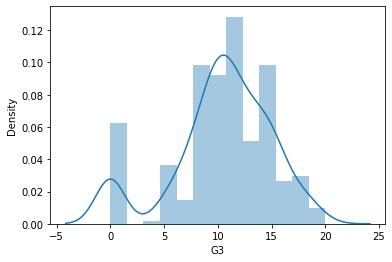

In [ ]:
sns.distplot(data.G3)

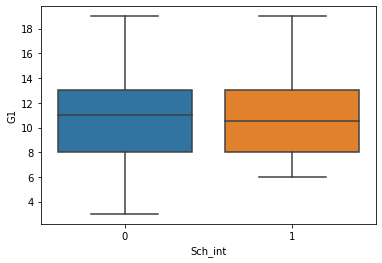

In [ ]:
sns.boxplot(x="Sch_int",y="G1",data=data)

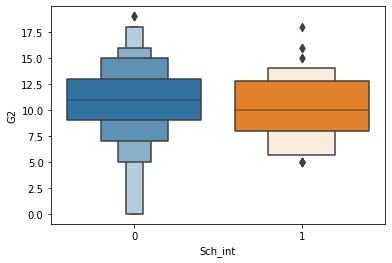

In [ ]:
sns.boxenplot(x="Sch_int",y="G2",data=data)

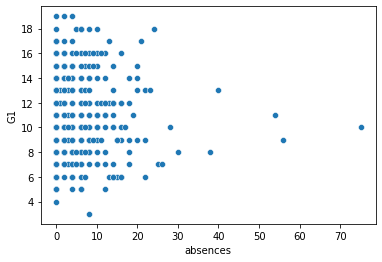

In [ ]:
sns.scatterplot(x=testing['absences'],y=testing['G1'])

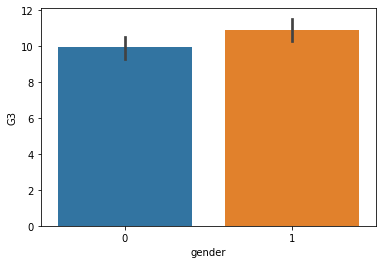

In [ ]:
sns.barplot(x="gender",y = "G3" , data=data)

In [ ]:
data.groupby("gender")["G3"].mean()

gender
0     9.966346
1    10.914439
Name: G3, dtype: float64

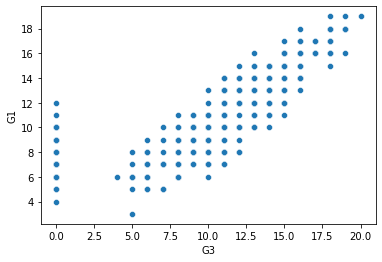

In [ ]:
sns.scatterplot(x=data['G3'],y=data['G1'],hue=data['G2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


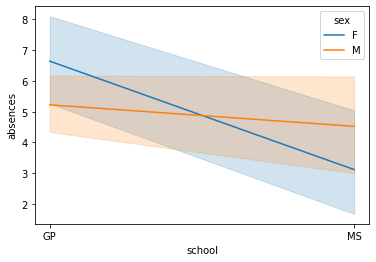

In [ ]:
sns.lineplot('school','absences', data=data, hue='sex');

Text(0, 0.5, 'G2')

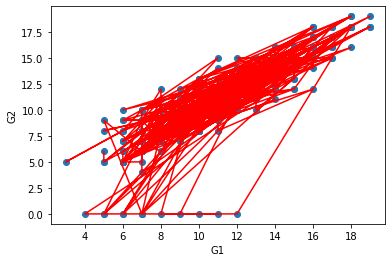

In [ ]:
plt.scatter(data.G1, data.G2)
plt.plot(data.G1,data.G2,color='red')
plt.xlabel('G1')
plt.ylabel('G2')

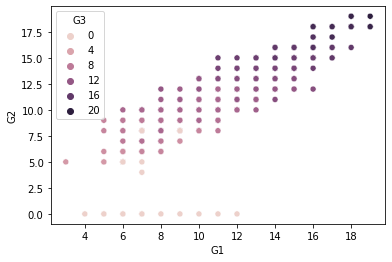

In [ ]:
sns.scatterplot(x='G1',y='G2',data=data,hue='G3')

In [ ]:
Z=data.groupby("G1")["G3"].median()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


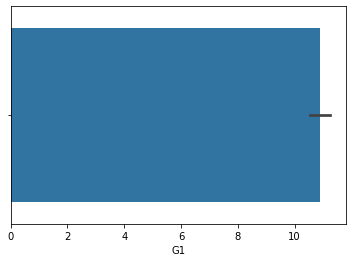

In [ ]:
sns.barplot(data.G1)

In [ ]:
n=data.groupby("G2")["G3"].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


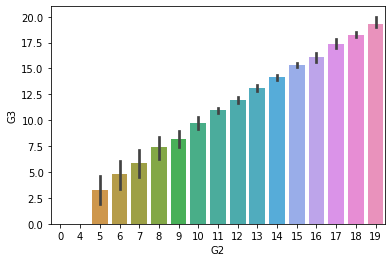

In [ ]:
sns.barplot(data.G2)

In [ ]:
m=data.groupby("G1")["G2"].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


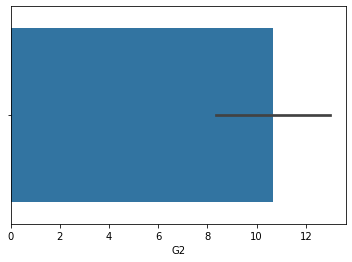

In [ ]:
sns.barplot(m)

([<matplotlib.patches.Wedge at 0x7f7802dcebd0>,
 [Text(1.0958691185386713, 0.09524114149502672, ''),
  Text(1.0835074999394987, 0.1897669559614033, ''),
  Text(1.0643962063152002, 0.2775981195574105, ''),
  Text(0.9968358829819987, 0.46510022833739756, ''),
  Text(0.8718554076297278, 0.6707221095109371, ''),
  Text(0.6668929274833552, 0.8747878732999678, ''),
  Text(0.38179726833389643, 1.0316156483365182, ''),
  Text(0.03384491549199792, 1.0994792047580253, ''),
  Text(-0.3546607913137147, 1.0412567997879918, ''),
  Text(-0.7244524193162996, 0.8277491722416646, ''),
  Text(-1.000997071808027, 0.456075500582695, ''),
  Text(-1.0995049783433342, -0.032997008928456535, ''),
  Text(-0.9569085323838543, -0.5425182583572449, ''),
  Text(-0.5590997990524967, -0.947315900161851, ''),
  Text(0.027276838792379934, -1.0996617543888187, ''),
  Text(0.641795103503831, -0.8933638928894021, ''),
  Text(1.044894150344436, -0.34379676347513727, '')],
 [Text(0.5977467919301843, 0.05194971354274184, '2.

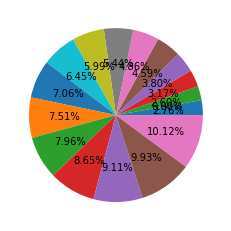

In [ ]:
plt.pie(m,autopct="%.2f%%")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


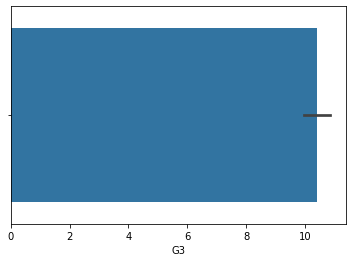

In [ ]:
sns.barplot(data.G3)

In [ ]:
np.mean(data.G1)

10.90886075949367

In [ ]:
np.mean(data.G2)

10.713924050632912

In [ ]:
np.mean(data.G3)

10.415189873417722

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


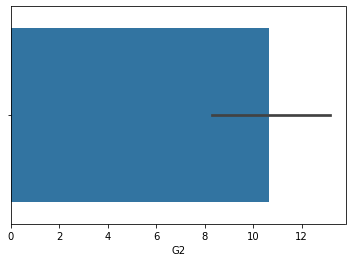

In [ ]:
sns.barplot(m)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


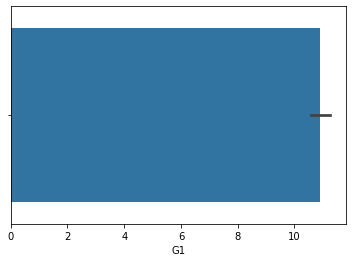

In [ ]:
sns.barplot(data.G1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


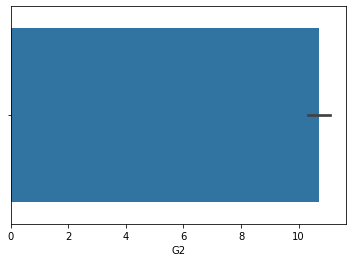

In [ ]:
sns.barplot(data.G2)

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['G1']
X = data[feature_cols]
y = data.gender
model_tt.fit(X, y)
data['gender_pred'] = model_tt.predict(X)

In [ ]:
data['gender_pred_class'] = np.where(data.gender_pred >= 0.5,1,0)

Text(0, 0.5, 'G3')

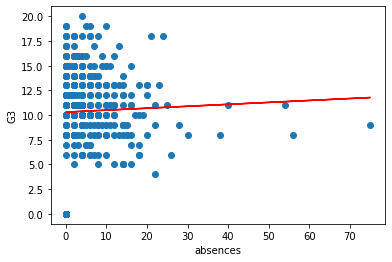

In [ ]:
# plot the class predictions
plt.scatter(data.G1, data.G3)
plt.plot(data.G1,data.G3_pred, color='red')
plt.xlabel('G1')
plt.ylabel('G3')

Text(0, 0.5, 'gender')

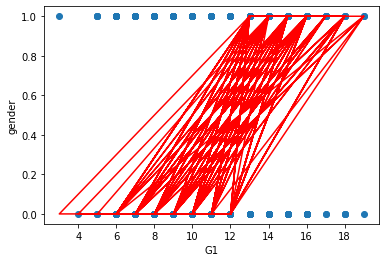

In [ ]:
# plot the class predictions
plt.scatter(data.G1, data.gender)
plt.plot(data.G1,data.gender_pred_class, color='red')
plt.xlabel('G1')
plt.ylabel('gender')

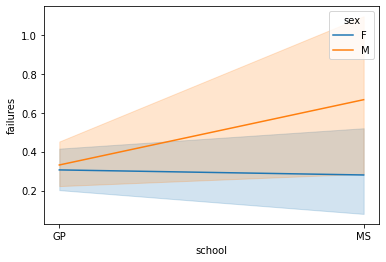

In [ ]:
sns.lineplot('school','failures', data=data, hue='sex');

In [ ]:
d=data.groupby("Medu")["Fedu"].count()
d

Medu
0      3
1     59
2    103
3     99
4    131
Name: Fedu, dtype: int64

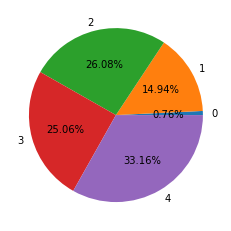

In [ ]:
plt.pie(d,labels=d.index,autopct="%.2f%%");
plt.show()

In [ ]:
e=data.groupby("Mjob")["Fjob"].count()
e

Mjob
at_home      59
health       34
other       141
services    103
teacher      58
Name: Fjob, dtype: int64

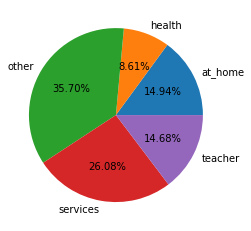

In [ ]:
plt.pie(e,labels=e.index,autopct="%.2f%%");
plt.show()

In [ ]:
sgf=data.groupby(["studytime","gender"])["failures"].count()
sgf

studytime  gender
1          0          27
           1          78
2          0         113
           1          85
3          0          51
           1          14
4          0          17
           1          10
Name: failures, dtype: int64

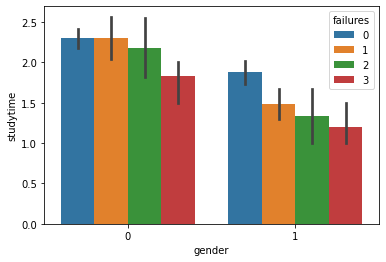

In [ ]:
sns.barplot(x="gender",y = "studytime" , data=data, hue='failures')

In [ ]:
gsf=data.groupby(["gender","studytime"])["failures"].count()
gsf

gender  studytime
0       1             27
        2            113
        3             51
        4             17
1       1             78
        2             85
        3             14
        4             10
Name: failures, dtype: int64

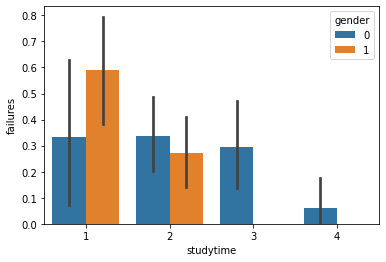

In [ ]:
sns.barplot(x="studytime",y = "failures" , data=data, hue='gender')

In [ ]:
gg=data.groupby(["gender"])["G3"].count()
gg

gender
0    208
1    187
Name: G3, dtype: int64

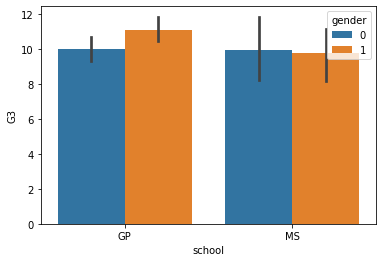

In [ ]:
sns.barplot(x="school",y = "G3" , data=data,hue='gender')

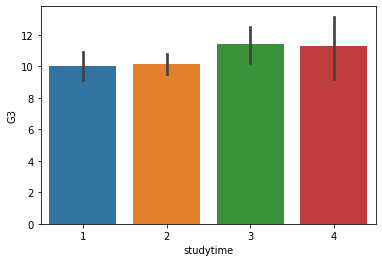

In [ ]:
sns.barplot(x="studytime",y = "G3" , data=data)

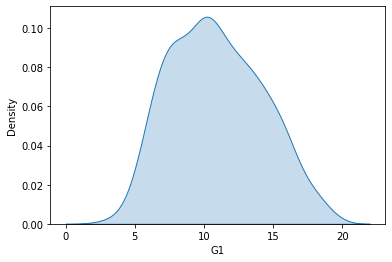

In [ ]:
sns.kdeplot(data.G1, shade=True)

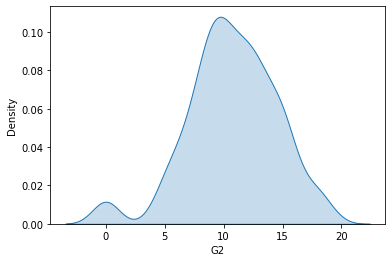

In [ ]:
sns.kdeplot(data.G2, shade=True)

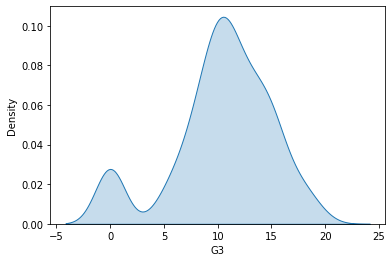

In [ ]:
sns.kdeplot(data.G3, shade=True)

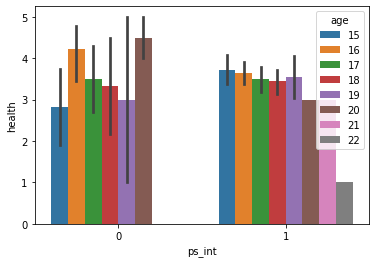

In [ ]:
sns.barplot(x="ps_int",y="health",data=data,hue="age")

in above graph we can see that students who are apart from family have less health when compared to the students who are living with there parents.

ps_int family status
0 - apart from family
1 - living with family

In [ ]:
data.groupby(['ps_int','health'])['gender'].count()

ps_int  health
0       1           8
        2           3
        3           7
        4           8
        5          15
1       1          39
        2          42
        3          84
        4          58
        5         131
Name: gender, dtype: int64

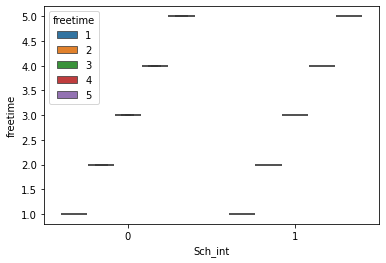

In [ ]:
sns.boxenplot(x='Sch_int',y='freetime',data=data,hue='freetime')

In [ ]:
data.groupby('Sch_int')['G3'].mean()

Sch_int
0    10.489971
1     9.847826
Name: G3, dtype: float64

in above line plot , we can see that both the schools have same no of periods or same timing but Gabriel Pereira school have more study rate compared to Mousinho da Silveira school.

In [ ]:
pd.crosstab(index=data['school'], columns=data['address'])

address,R,U
school,,
GP,63,286
MS,25,21


in above table we can see that more students are from urban area...

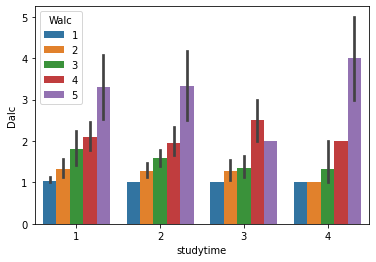

In [ ]:
sns.barplot(x="studytime",y = "Dalc" , data=data,hue="Walc")

In [ ]:
data.groupby(["age","Walc"])["Walc"].sum()

age  Walc
15   1       46
     2       24
     3       39
     4       32
     5       15
16   1       42
     2       46
     3       45
     4       64
     5       40
17   1       25
     2       46
     3       81
     4       60
     5       40
18   1       27
     2       40
     3       48
     4       48
     5       35
19   1        9
     2       14
     3       24
20   1        2
     5        5
21   3        3
22   5        5
Name: Walc, dtype: int64

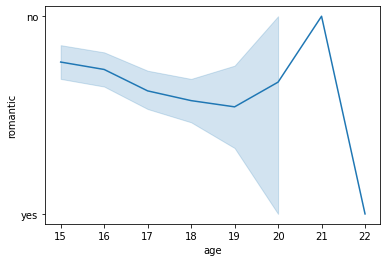

In [ ]:
sns.lineplot(x="age",y="romantic",data=data)

In [ ]:
pd.crosstab(index=data['school'], columns=data['gender'])

gender,0,1
school,,
GP,183,166
MS,25,21


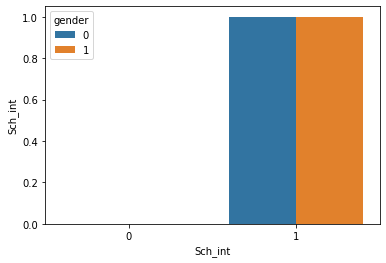

In [ ]:
sns.barplot(x='Sch_int',y='Sch_int',data=data,hue='gender')

In [ ]:
fmh = data.groupby(['Mjob','Fjob'])['higher'].count()
fmh

Mjob      Fjob    
at_home   at_home       7
          health        2
          other        33
          services     15
          teacher       2
health    health        6
          other        17
          services     10
          teacher       1
other     at_home       5
          health        2
          other       104
          services     24
          teacher       6
services  at_home       6
          health        4
          other        42
          services     43
          teacher       8
teacher   at_home       2
          health        4
          other        21
          services     19
          teacher      12
Name: higher, dtype: int64

In [ ]:
sns.barplot(y=fmh1.values)

AttributeError: ignored

In [ ]:
Fjob=data['Fjob']
Mjob=data['Mjob']
higher=data['higher']
fmh1 = pd.MultiIndex.from_arrays([Fjob,Mjob,higher], names=('Fjob', 'Mjob','Higher'))
fmh1

MultiIndex([( 'teacher',  'at_home', 'yes'),
            (   'other',  'at_home', 'yes'),
            (   'other',  'at_home', 'yes'),
            ('services',   'health', 'yes'),
            (   'other',    'other', 'yes'),
            (   'other', 'services', 'yes'),
            (   'other',    'other', 'yes'),
            ( 'teacher',    'other', 'yes'),
            (   'other', 'services', 'yes'),
            (   'other',    'other', 'yes'),
            ...
            (   'other',  'at_home', 'yes'),
            ( 'at_home',  'teacher', 'yes'),
            (   'other', 'services', 'yes'),
            ('services',  'teacher', 'yes'),
            (   'other',    'other', 'yes'),
            ('services', 'services', 'yes'),
            ('services', 'services', 'yes'),
            (   'other',    'other', 'yes'),
            (   'other', 'services', 'yes'),
            ( 'at_home',    'other', 'yes')],
           names=['Fjob', 'Mjob', 'Higher'], length=395)

In [ ]:
plt.pie(e,labels=e.index,autopct="%.2f%%");
plt.show()

# Linear regression

In [ ]:
X = data['Sch_int','gender','add_int','reason_int','studytime','failures','schoolsup_int','paid_int','act_int','health','absences','G1','G2']
y = data.G3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm3 = LinearRegression()
lm3.fit(X_train, y_train)
y_pred = lm3.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_test, y_pred)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                    ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_test, y_pred)                ##R-squared (Coefficient of determination)
print(mae)
print(mse)
print(rmse)
print(r2)

1.179056295339554
3.409483220685156
1.8464786001156785
0.8294657243356409


In [ ]:
lm3 = smf.ols(formula='G3 ~ Sch_int+gender+add_int+reason_int+studytime+failures+schoolsup_int+paid_int+act_int+health+absences+G1+G2', data=data).fit()
lm3.params 

Intercept       -1.892788
Sch_int          0.065265
gender           0.248612
add_int          0.027831
reason_int       0.123367
studytime       -0.120276
failures        -0.269688
schoolsup_int   -0.605915
paid_int        -0.154515
act_int          0.324360
health           0.088296
absences         0.039895
G1               0.176712
G2               0.964827
dtype: float64

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          2.77e-139
Time:                        12:40:38   Log-Likelihood:                -807.29
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     381   BIC:                             1698.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8928      0.598     -3.167      0.002      -3.068      -0.718
Sch_int           0.0653      0.322      0.203      0.839      -0.568       0.698
gender            0.2486      0.211      1.179      0.239      -0.166       0.663
add_int           0.0278      0.246      0.113      0.910      -0.455       0.511
reason_int        0.1234      0.102      1.207      0.228      -0.078       0.324
studytime        -0.1203      0.126     -0.951      0.342      -0.369       0.128
failures         -0.2697      0.143     -1.890      0.059      -0.550       0.011
schoolsup_int    -0.6059      0.302     -2.009      0.045      -1.199      -0.013
paid_int         -0.1545      0.201     -0.768      0.443      -0.550       0.241
act_int           0.3244      0.196      1.652      0.099      -0.062       0.710
health            0.0883      0.071      1.252      0.211      -0.050       0.227
absences          0.0399      0.012      3.251      0.001       0.016       0.064
G1                0.1767      0.058      3.057      0.002       0.063       0.290
G2                0.9648      0.050     19.206      0.000       0.866       1.064
==============================================================================
Omnibus:                      202.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.945
Skew:                          -2.212   Prob(JB):                    2.33e-239
Kurtosis:                       9.871   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm1 = smf.ols(formula='G3 ~ Sch_int+gender+add_int+reason_int+studytime+failures+schoolsup_int+paid_int+act_int+health+absences+G1+G2', data=data).fit()
lm1.params

Intercept       -1.892788
Sch_int          0.065265
gender           0.248612
add_int          0.027831
reason_int       0.123367
studytime       -0.120276
failures        -0.269688
schoolsup_int   -0.605915
paid_int        -0.154515
act_int          0.324360
health           0.088296
absences         0.039895
G1               0.176712
G2               0.964827
dtype: float64

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          2.77e-139
Time:                        12:40:46   Log-Likelihood:                -807.29
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     381   BIC:                             1698.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8928      0.598     -3.167      0.002      -3.068      -0.718
Sch_int           0.0653      0.322      0.203      0.839      -0.568       0.698
gender            0.2486      0.211      1.179      0.239      -0.166       0.663
add_int           0.0278      0.246      0.113      0.910      -0.455       0.511
reason_int        0.1234      0.102      1.207      0.228      -0.078       0.324
studytime        -0.1203      0.126     -0.951      0.342      -0.369       0.128
failures         -0.2697      0.143     -1.890      0.059      -0.550       0.011
schoolsup_int    -0.6059      0.302     -2.009      0.045      -1.199      -0.013
paid_int         -0.1545      0.201     -0.768      0.443      -0.550       0.241
act_int           0.3244      0.196      1.652      0.099      -0.062       0.710
health            0.0883      0.071      1.252      0.211      -0.050       0.227
absences          0.0399      0.012      3.251      0.001       0.016       0.064
G1                0.1767      0.058      3.057      0.002       0.063       0.290
G2                0.9648      0.050     19.206      0.000       0.866       1.064
==============================================================================
Omnibus:                      202.797   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.945
Skew:                          -2.212   Prob(JB):                    2.33e-239
Kurtosis:                       9.871   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm1.rsquared

0.8333481667994753

In [ ]:
X = data[["Sch_int","gender","add_int","reason_int","act_int","health","absences","G1","G2"]]
y = data.G3
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3)
lm4 = LinearRegression()
lm4.fit(X_train4, y_train4)
y_pred4 = lm4.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

1.9175782670264354


In [ ]:
mae = metrics.mean_absolute_error(y_test4, y_pred4)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_test4, y_pred4)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                    ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_test4, y_pred4)                ##R-squared (Coefficient of determination)

print(mae)
print(mse)
print(rmse)
print(r2)

1.222853832369576
3.677106410172107
1.9175782670264354
0.8297036861875029


In [ ]:
lm2 = smf.ols(formula='G3 ~ Sch_int+gender+add_int+reason_int+act_int+health+absences+G1+G2', data=data).fit()
lm2.params

Intercept    -2.818282
Sch_int      -0.017653
gender        0.212372
add_int      -0.001537
reason_int    0.131125
act_int       0.301707
health        0.079007
absences      0.039548
G1            0.154891
G2            0.991597
dtype: float64

In [ ]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          8.13e-142
Time:                        17:17:56   Log-Likelihood:                -812.12
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     385   BIC:                             1684.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8183      0.477     -5.905      0.000      -3.757      -1.880
Sch_int       -0.0177      0.319     -0.055      0.956      -0.646       0.610
gender         0.2124      0.197      1.075      0.283      -0.176       0.601
add_int       -0.0015      0.246     -0.006      0.995      -0.486       0.483
reason_int     0.1311      0.102      1.284      0.200      -0.070       0.332
act_int        0.3017      0.196      1.538      0.125      -0.084       0.687
health         0.0790      0.071      1.114      0.266      -0.060       0.218
absences       0.0395      0.012      3.223      0.001       0.015       0.064
G1             0.1549      0.056      2.778      0.006       0.045       0.265
G2             0.9916      0.050     20.000      0.000       0.894       1.089
==============================================================================
Omnibus:                      211.797   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1197.675
Skew:                          -2.317   Prob(JB):                    8.48e-261
Kurtosis:                      10.163   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = data[["gender","reason_int","act_int","health","absences","G1","G2"]]
y = data.G3
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3)
lm5 = LinearRegression()
lm5.fit(X_train5, y_train5)
y_pred5 = lm5.predict(X_test5)
print(np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))


1.902693382159543


In [ ]:
mae = metrics.mean_absolute_error(y_test5, y_pred5)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_test5, y_pred5)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                    ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_test5, y_pred5)                ##R-squared (Coefficient of determination)

print(mae)
print(mse)
print(rmse)
print(r2)

1.197814233078953
3.6202421065137207
1.902693382159543
0.7927799172581214


In [ ]:
lm = smf.ols(formula='G3 ~ gender+reason_int+act_int+health+absences+G1+G2', data=data).fit()
lm.params

Intercept    -2.820765
gender        0.212282
reason_int    0.130365
act_int       0.300496
health        0.079231
absences      0.039599
G1            0.154744
G2            0.991802
dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          3.03e-144
Time:                        12:41:07   Log-Likelihood:                -812.12
No. Observations:                 395   AIC:                             1640.
Df Residuals:                     387   BIC:                             1672.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8208      0.472     -5.973      0.000      -3.749      -1.892
gender         0.2123      0.197      1.078      0.282      -0.175       0.599
reason_int     0.1304      0.101      1.294      0.197      -0.068       0.328
act_int        0.3005      0.194      1.553      0.121      -0.080       0.681
health         0.0792      0.071      1.123      0.262      -0.060       0.218
absences       0.0396      0.012      3.253      0.001       0.016       0.064
G1             0.1547      0.055      2.791      0.006       0.046       0.264
G2             0.9918      0.049     20.226      0.000       0.895       1.088
==============================================================================
Omnibus:                      211.673   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1195.419
Skew:                          -2.315   Prob(JB):                    2.62e-260
Kurtosis:                      10.155   Cond. No.                         87.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = data[["absences","G1","G2"]]
y = data.G3
X_traino, X_testo, y_traino, y_testo = train_test_split(X, y, test_size=0.2)
lm_0 = LinearRegression()
lm_0.fit(X_traino, y_traino)
y_predo = lm_0.predict(X_testo)
print(np.sqrt(metrics.mean_squared_error(y_testo, y_predo)))

1.79010608743047


In [ ]:
metrics.explained_variance_score(y_testo, y_predo)

0.8429622612013908

In [ ]:
mae = metrics.mean_absolute_error(y_testo, y_predo)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_testo, y_predo)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                    ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_testo, y_predo)                ##R-squared (Coefficient of determination)

print(mae)
print(mse)
print(rmse)
print(r2)

1.2364168562075275
4.214499829536561
2.052924701380097
0.8160007454624856


In [ ]:
lm_hm = smf.ols(formula='G3 ~ absences+G1+G2', data=data).fit()
lm_hm.params

Intercept   -2.067468
absences     0.036354
G1           0.154525
G2           0.988380
dtype: float64

In [ ]:
lm_hm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     619.5
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.90e-148
Time:                        18:13:10   Log-Likelihood:                -815.59
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     391   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0675      0.341     -6.060      0.000      -2.738      -1.397
absences       0.0364      0.012      3.010      0.003       0.013       0.060
G1             0.1545      0.056      2.779      0.006       0.045       0.264
G2             0.9884      0.049     20.142      0.000       0.892       1.085
==============================================================================
Omnibus:                      228.806   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.871
Skew:                          -2.493   Prob(JB):                         0.00
Kurtosis:                      11.046   Cond. No.                         60.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
org_lm = smf.ols(formula='G3 ~ Sex+address+reason+studytime+failures+schoolsup+paid+activities+health+absences+G1+G2', data=data).fit()


PatsyError: ignored

In [ ]:
model = smf.ols(formula='G3 ~ Sch_int+gender+reason_int+studytime+failures+schoolsup_int+paid_int+act_int+health+absences+G1+G2', data=data).fit()
model.params

Intercept       -1.890539
Sch_int          0.075589
gender           0.249960
reason_int       0.124517
studytime       -0.119013
failures        -0.269089
schoolsup_int   -0.606483
paid_int        -0.154062
act_int          0.322543
health           0.088543
absences         0.040000
G1               0.177096
G2               0.964207
dtype: float64

In [ ]:
model.rsquared

0.8333425527375488

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     159.2
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          2.16e-140
Time:                        17:44:06   Log-Likelihood:                -807.29
No. Observations:                 395   AIC:                             1641.
Df Residuals:                     382   BIC:                             1692.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.8905      0.597     -3.169      0.002      -3.063      -0.718
Sch_int           0.0756      0.308      0.245      0.807      -0.531       0.682
gender            0.2500      0.210      1.188      0.235      -0.164       0.664
reason_int        0.1245      0.102      1.226      0.221      -0.075       0.324
studytime        -0.1190      0.126     -0.946      0.345      -0.366       0.128
failures         -0.2691      0.142     -1.890      0.060      -0.549       0.011
schoolsup_int    -0.6065      0.301     -2.014      0.045      -1.199      -0.014
paid_int         -0.1541      0.201     -0.766      0.444      -0.549       0.241
act_int           0.3225      0.195      1.651      0.100      -0.062       0.707
health            0.0885      0.070      1.258      0.209      -0.050       0.227
absences          0.0400      0.012      3.273      0.001       0.016       0.064
G1                0.1771      0.058      3.073      0.002       0.064       0.290
G2                0.9642      0.050     19.334      0.000       0.866       1.062
==============================================================================
Omnibus:                      202.967   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1101.152
Skew:                          -2.213   Prob(JB):                    7.72e-240
Kurtosis:                       9.878   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = data[["Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2"]]
y = data.G3
##X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2)
X_training, X_testing, y_training, y_testing = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
model_tt = LinearRegression()
model_tt.fit(X_training, y_training)
y_pred_tt = model_tt.predict(X_testing)
print(np.sqrt(metrics.mean_squared_error(y_testing, y_pred_tt)))

1.8979535462926462


In [ ]:
metrics.explained_variance_score(y_testing, y_pred_tt)

0.815065748314197

In [ ]:
mae = metrics.mean_absolute_error(y_testing, y_pred_tt)  ##MAE (Mean absolute error)
mse = metrics.mean_squared_error(y_testing, y_pred_tt)   ##MSE (Mean Squared Error) 
rmse = np.sqrt(mse) # or mse**(0.5)                    ##RMSE (Root Mean Squared Error)
r2 = metrics.r2_score(y_testing, y_pred_tt)                ##R-squared (Coefficient of determination)

In [ ]:
print(mae)
print(mse)
print(rmse)
print(r2)

1.115270382800426
2.253364120335092
1.5011209545986266
0.8585077893791117


### ***For our review to understand***

**Regression accuracy metrics**

   The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

**The above metrics can be expressed,**
 
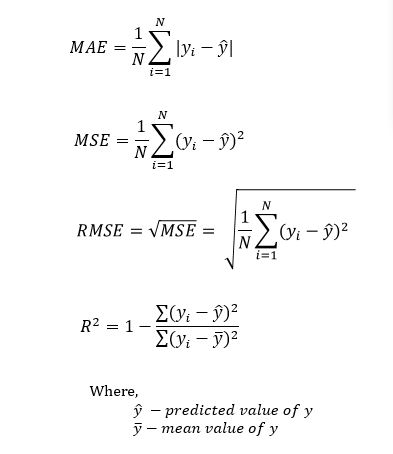

In [ ]:
model_tt.intercept_ + model_tt.coef_ * 2

array([-1.32326851, -1.89389315, -2.46004192, -2.30259916, -2.8193187 ,
       -3.09563319, -3.47951295, -2.61074478, -1.8569979 , -2.00887844,
       -2.2752103 , -2.02549695, -0.38013979])

In [ ]:
X = data[["Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2"]]
y = data.G3
##X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2)
X_training, X_testing, y_training, y_testing = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
model_tt = LinearRegression()
model_tt.fit(X_training, y_training)
y_pred_tt = model_tt.predict(X_testing)
print(np.sqrt(metrics.mean_squared_error(y_testing, y_pred_tt)))


1.5011209545986266


in above line plot , we can see that both the schools have same no of periods or same timing but Gabriel Pereira school have more study rate compared to Mousinho da Silveira school.

# Neural Network

In [ ]:
df = pd.get_dummies(data, columns=['reason'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,fs_int,ps_int,nur_int,high_int,int_int,rom_int,reason_course,reason_home,reason_other,reason_reputation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,0,0,1,1,1,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,1,1,0,0,1,1,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,1,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,0,0,0,0,0,1,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,1,0,0,0,1,1,1,0,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,1,1,1,0,0,1,1,0,0,0
392,MS,M,21,R,GT3,T,1,1,other,other,...,0,1,1,0,1,1,1,0,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,1,1,0,0,1,1,0,0,0


In [ ]:
nn_data = df[{"Sch_int","gender","add_int","reason_course","reason_home","reason_other","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2","G3"}]

NameError: ignored

In [ ]:
x= nn_data.drop("G3", axis=1)
y=nn_data["G3"]
x.head

<bound method NDFrame.head of      health  reason_home  add_int  G2  absences  G1  reason_course  \
0         3            0        0   6         6   5              1   
1         3            0        0   5         4   5              1   
2         3            0        0   8        10   7              0   
3         5            1        0  14         2  15              0   
4         5            1        0  10         4   6              0   
..      ...          ...      ...  ..       ...  ..            ...   
390       4            0        0   9        11   9              1   
391       2            0        0  16         3  14              1   
392       3            0        1   8         3  10              1   
393       5            0        1  12         0  11              1   
394       5            0        0   9         5   8              1   

     reason_other  studytime  failures  act_int  paid_int  schoolsup_int  \
0               0          2         0        1      

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=42)
y_test

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                        tf.keras.layers.Dense(13),
                        tf.keras.layers.Dense(7),
                        tf.keras.layers.Dense(6),
                        tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae'])

# STEP1: Fit the model

history = model.fit(x_train, y_train, epochs=200, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.0158 - mae: 1.0158


[1.015805721282959, 1.015805721282959]

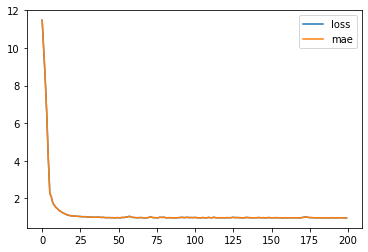

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                208       
                                                                 
 dense_13 (Dense)            (None, 7)                 98        
                                                                 
 dense_14 (Dense)            (None, 6)                 48        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(100-(1.96*1.0169))

98.006876


In [ ]:
nn_data = data[{"Sch_int","gender","add_int","reason_int","studytime","failures","schoolsup_int","paid_int","act_int","health","absences","G1","G2","G3"}]

In [ ]:
x= nn_data.drop("G3", axis=1)
y=nn_data["G3"]
x.head

<bound method NDFrame.head of      act_int  schoolsup_int  G1  health  Sch_int  add_int  G2  gender  \
0          1              0   5       3        0        0   6       0   
1          1              1   5       3        0        0   5       0   
2          1              0   7       3        0        0   8       0   
3          0              1  15       5        0        0  14       0   
4          1              1   6       5        0        0  10       0   
..       ...            ...  ..     ...      ...      ...  ..     ...   
390        1              1   9       4        1        0   9       1   
391        1              1  14       2        1        0  16       1   
392        1              1  10       3        1        1   8       1   
393        1              1  11       5        1        1  12       1   
394        1              1   8       5        1        0   9       1   

     paid_int  absences  reason_int  studytime  failures  
0           1         6           

## Different models outputs in nn


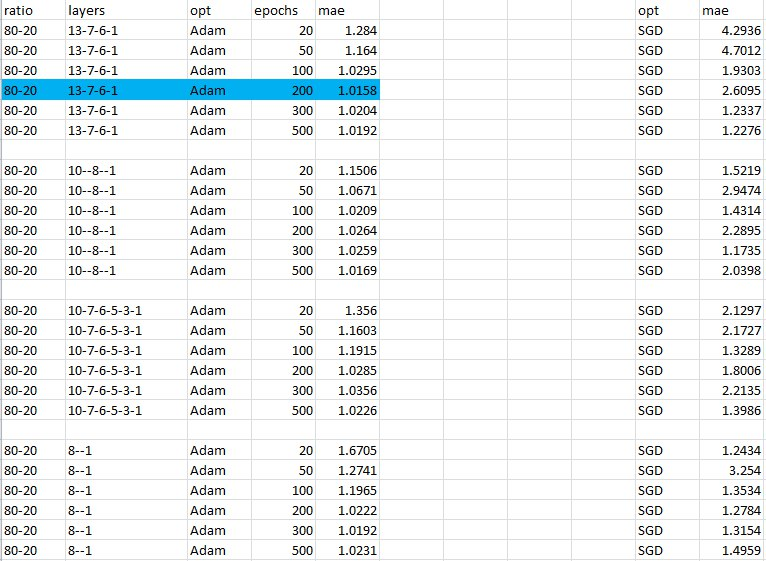

# ADABoosting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=1)
y_test

146     0
379    10
247     8
197    10
368    10
       ..
242     0
106     8
191     9
82      6
364    12
Name: G3, Length: 99, dtype: int64

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
regr.score(X,y)

0.9771376939813695

In [ ]:
from tensorflow.python.ops.stateless_random_ops import Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

base_est = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator = base_est,
                           algorithm="SAMME",
                            random_state=0)

In [ ]:
from os import pipe
adaboost.fit(x_train,y_train)
y_pred = adaboost.predict(x_test)

In [ ]:
y_pred

array([ 0,  9,  8, 10, 10, 13,  7, 11, 14,  8, 12, 14,  8,  8,  9, 12, 15,
       18,  0, 10, 12, 18, 10, 10, 15,  8, 12,  8, 10, 15, 12, 12,  8, 10,
       12,  8, 12, 11,  8, 12, 10, 11, 16, 10, 11, 12, 18, 11, 11,  9,  4,
       12, 11,  6,  8, 10,  6, 15, 10,  0,  0,  0, 13, 16, 15, 10, 12, 16,
       10, 11, 15, 14, 11, 13, 13, 10, 12, 12, 11, 11,  0, 10, 15,  6, 12,
       10, 10, 11,  0, 11, 12,  0, 19, 10,  0,  6,  0,  6, 12])

In [ ]:
adaboost.estimator_errors_

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
adaboost.estimator_weights_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])